### Import Statements

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd           # For working with data in tabular form
import matplotlib.pylab as plt # For data visualization


import os                    # For interacting with the operating system
from re import search        # For searching patterns in strings
import shutil                # For high-level file operations
import natsort               # For sorting file paths in natural order

from PIL import Image        # For opening, manipulating, and saving images

import tensorflow as tf          # For building and training machine learning models
from tqdm import tqdm             #displaying a progress bar with relevant information
import cv2

from tensorflow.keras import layers

In [2]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, Dropout

### LOADING IMAGES

1. created train and validation folder for each type of the data.


In [ ]:
import os
import random
import shutil

def split_data(folder_path, train_ratio=0.8):
    # Step 1: List files in the folder
    files = os.listdir(folder_path)
    num_files = len(files)

    # Step 2: Split files into training and test sets
    random.shuffle(files)
    train_size = int(train_ratio * num_files)
    train_set = files[:train_size]
    test_set = files[train_size:]

    # Step 3: Create folders for training and test sets
    train_folder = os.path.join(folder_path, 'train')
    test_folder = os.path.join(folder_path, 'test')

    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # Step 4: Move files to the respective folders
    for file in train_set:
        shutil.move(os.path.join(folder_path, file), os.path.join(train_folder, file))

    for file in test_set:
        shutil.move(os.path.join(folder_path, file), os.path.join(test_folder, file))

# Specify the full path to the directory
main_directory = '/content/drive/MyDrive/dataset'

# Get a list of folders in the main directory
folders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]

# Iterate through each folder and split the data
for folder in folders:
    folder_path = os.path.join(main_directory, folder)
    split_data(folder_path)



In [ ]:
import os
import shutil

def move_files(source_folder, destination_folder, num_files=150):
    # Step 1: Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Step 2: List files in the source folder
    files = os.listdir(source_folder)

    # Step 3: Sort files (optional)
    files.sort()

    # Step 4: Move the specified number of files to the destination folder
    for i in range(min(num_files, len(files))):
        source_path = os.path.join(source_folder, files[i])
        destination_path = os.path.join(destination_folder, files[i])
        shutil.move(source_path, destination_path)

# Specify the source and destination folders
source_folder = '/path/to/source_folder'
destination_folder = '/path/to/destination_folder'

# Run the function to move 150 files
move_files(source_folder, destination_folder, num_files=150)


In [4]:
files = os.listdir('/content/drive/MyDrive/research_Apple/train/train_Black_rot')
num_files = len(files)
num_files

950

### Resizing


In [3]:
base_dir = '/content/drive/MyDrive/research_Apple'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

In [4]:
num_healthy_tr = len(os.listdir(os.path.join(train_dir, 'train_healthy')))
num_scab_tr = len(os.listdir(os.path.join(train_dir, 'train_Apple_Scab')))
num_rust_tr = len(os.listdir(os.path.join(train_dir, 'train_Cedar_Apple_rust')))
num_frog_eye_tr = len(os.listdir(os.path.join(train_dir,'train_Black_rot')))

total_train = num_healthy_tr + num_rust_tr+ num_scab_tr + num_frog_eye_tr

print("Total Training Dataset Images:",  total_train)
print("Healthy In Training set      : ", num_healthy_tr)
print("Frog_eye In Training         : ", num_frog_eye_tr)
print("Scab In Training set         : ", num_scab_tr)
print("Rust In Training set         : ", num_rust_tr)


Total Training Dataset Images: 4173
Healthy In Training set      :  1323
Frog_eye In Training         :  950
Scab In Training set         :  950
Rust In Training set         :  950


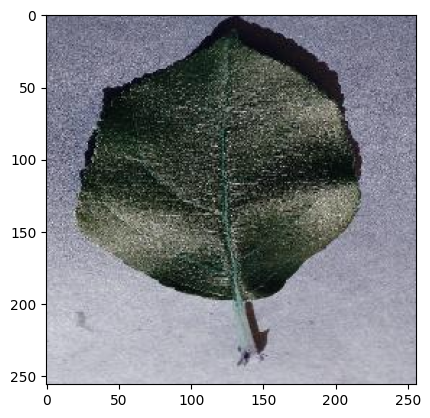

In [5]:
Train_DIR = '/content/drive/MyDrive/research_Apple/train'
Categories = ['train_healthy','tarin_Black_rot','train_Cedar_Apple_rust','train_Apple_Scab']

for j in Categories :
    path = os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    break


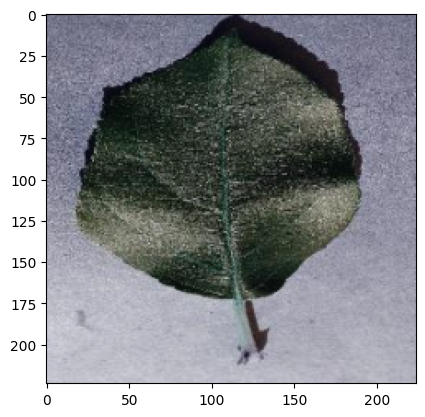

In [6]:
IMG_SIZE = 224
new_image = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

### Train and Validation Split


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob # allowing you to easily retrieve and process files based on specific patterns.

In [8]:
batch_size = 32
# IMG_SIZE = 224  ---- already defined

In [9]:
datagen=ImageDataGenerator(rescale=1./255,
                          validation_split=0.2)

In [10]:
train_datagen=datagen.flow_from_directory('/content/drive/MyDrive/research_Apple/train',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical',
                                          subset = 'training',
                                          shuffle=True,
                                          color_mode="rgb",
                                          seed=42
                                        )

Found 3339 images belonging to 4 classes.


In [11]:
val_datagen=datagen.flow_from_directory('/content/drive/MyDrive/research_Apple/train',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical',
                                        subset = 'validation',
                                          shuffle=False,
                                          color_mode="rgb",
                                          seed=42
                                        )

Found 834 images belonging to 4 classes.


In [12]:
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/research_Apple/test',
    target_size=(224, 224),  # Replace with your actual image size
    batch_size=batch_size,  # Replace with your batch size
    class_mode='categorical',  # Adjust based on your model output
    shuffle=False
)

Found 481 images belonging to 4 classes.


In [133]:
# Reset our image data generators
train_datagen.reset()
val_datagen.reset()
test_generator.reset()

### Training Models

1. VGG16
2. RestNet50
3. Inception
4. InceptionRestnetV2
5. MobileNetV2
6. Xception

In [13]:
from tensorflow.keras.layers import Dense, Flatten , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, InceptionResNetV2, MobileNetV2, Xception
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import Adam

### 1. InceptionRestnetV2


In [121]:
IR_base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )

219055592/219055592 [==============================] - 11s 0us/step


In [122]:
for layer in IR_base_model.layers:
  layer.trainable = False

In [123]:
folders = glob('/content/drive/MyDrive/research_Apple/train/*')


IR_model = tf.keras.Sequential([
        IR_base_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

In [124]:
IR_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [125]:
IR_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 batch_normalization_306 (B  (None, 5, 5, 1536)        10752     
 atchNormalization)                                              
                                                                 
 global_average_pooling2d_5  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_20 (Dense)            (None, 512)               786944    
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                      

In [127]:
IR_1 = IR_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-127-41feb717f2f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  IR_1 = IR_model.fit_generator(


104/104 [==============================] - 43s 281ms/step - loss: 0.5305 - accuracy: 0.7910 - val_loss: 0.1580 - val_accuracy: 0.9459
Epoch 2/15
104/104 [==============================] - 24s 229ms/step - loss: 0.1494 - accuracy: 0.9474 - val_loss: 0.1546 - val_accuracy: 0.9519
Epoch 3/15
104/104 [==============================] - 24s 230ms/step - loss: 0.1216 - accuracy: 0.9652 - val_loss: 0.1082 - val_accuracy: 0.9651
Epoch 4/15
104/104 [==============================] - 24s 231ms/step - loss: 0.0825 - accuracy: 0.9752 - val_loss: 0.1304 - val_accuracy: 0.9591
Epoch 5/15
104/104 [==============================] - 23s 224ms/step - loss: 0.0617 - accuracy: 0.9764 - val_loss: 0.1226 - val_accuracy: 0.9663
Epoch 6/15
104/104 [==============================] - 24s 226ms/step - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.1029 - val_accuracy: 0.9712
Epoch 7/15
104/104 [==============================] - 24s 234ms/step - loss: 0.0186 - accuracy: 0.9955 - val_loss: 0.0849 - val_accuracy: 0.9

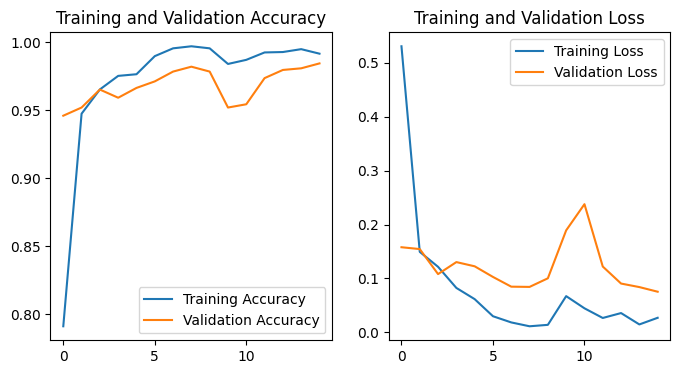

In [128]:
IR1_acc = IR_1.history['accuracy']
IR1_val_acc = IR_1.history['val_accuracy']

IR1_loss = IR_1.history['loss']
IR1_val_loss = IR_1.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, IR1_acc, label='Training Accuracy')
plt.plot(epochs_range, IR1_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, IR1_loss, label='Training Loss')
plt.plot(epochs_range, IR1_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 8s 236ms/step


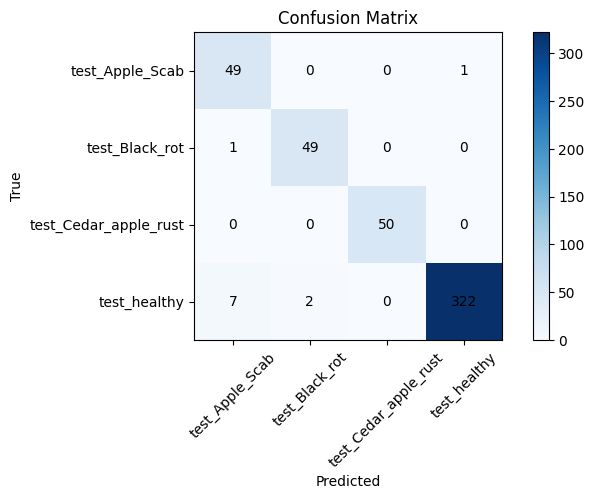

In [129]:
predictions = IR_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [130]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.86      0.98      0.92        50
       test_Black_rot       0.96      0.98      0.97        50
test_Cedar_apple_rust       1.00      1.00      1.00        50
         test_healthy       1.00      0.97      0.98       331

             accuracy                           0.98       481
            macro avg       0.95      0.98      0.97       481
         weighted avg       0.98      0.98      0.98       481



Learning Rate = 0.005

In [131]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005)

In [132]:
IR_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [134]:
IR_2 = IR_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-134-1684b4f72131>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  IR_2 = IR_model.fit_generator(


104/104 [==============================] - 44s 309ms/step - loss: 0.4472 - accuracy: 0.9380 - val_loss: 0.1187 - val_accuracy: 0.9651
Epoch 2/15
104/104 [==============================] - 24s 234ms/step - loss: 0.1002 - accuracy: 0.9794 - val_loss: 0.1667 - val_accuracy: 0.9615
Epoch 3/15
104/104 [==============================] - 24s 228ms/step - loss: 0.1350 - accuracy: 0.9743 - val_loss: 0.1834 - val_accuracy: 0.9603
Epoch 4/15
104/104 [==============================] - 28s 270ms/step - loss: 0.1917 - accuracy: 0.9716 - val_loss: 0.2891 - val_accuracy: 0.9339
Epoch 5/15
104/104 [==============================] - 27s 261ms/step - loss: 0.1601 - accuracy: 0.9707 - val_loss: 0.1568 - val_accuracy: 0.9651
Epoch 6/15
104/104 [==============================] - 27s 257ms/step - loss: 0.0828 - accuracy: 0.9819 - val_loss: 0.1773 - val_accuracy: 0.9627
Epoch 7/15
104/104 [==============================] - 27s 258ms/step - loss: 0.0811 - accuracy: 0.9852 - val_loss: 0.1458 - val_accuracy: 0.9

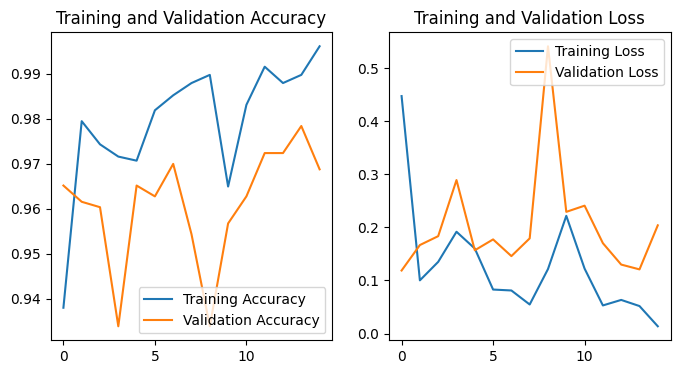

In [135]:
IR2_acc = IR_2.history['accuracy']
IR2_val_acc = IR_2.history['val_accuracy']

IR2_loss = IR_2.history['loss']
IR2_val_loss = IR_2.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, IR2_acc, label='Training Accuracy')
plt.plot(epochs_range, IR2_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, IR2_loss, label='Training Loss')
plt.plot(epochs_range, IR2_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 6s 166ms/step


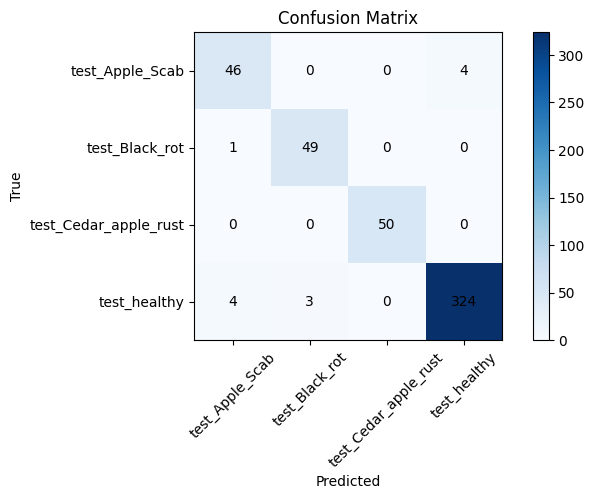

In [136]:
predictions = IR_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [137]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.90      0.92      0.91        50
       test_Black_rot       0.94      0.98      0.96        50
test_Cedar_apple_rust       1.00      1.00      1.00        50
         test_healthy       0.99      0.98      0.98       331

             accuracy                           0.98       481
            macro avg       0.96      0.97      0.96       481
         weighted avg       0.98      0.98      0.98       481



### 2. ResNe50

In [14]:
RestNet_base_model = tf.keras.applications.ResNet50(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )

94765736/94765736 [==============================] - 5s 0us/step


In [15]:
for layer in RestNet_base_model.layers:
  layer.trainable = False

In [16]:
folders = glob('/content/drive/MyDrive/research_Apple/train/*')


RestNet_model = tf.keras.Sequential([
        RestNet_base_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

In [17]:
RestNet_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
RestNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        14336     
 Normalization)                                                  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0

In [20]:
RestNet_1 = RestNet_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

<ipython-input-20-4afbf07385d4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  RestNet_1 = RestNet_model.fit_generator(


Epoch 1/15
104/104 [==============================] - 3343s 32s/step - loss: 1.3311 - accuracy: 0.3438 - val_loss: 1.1144 - val_accuracy: 0.5072
Epoch 2/15
104/104 [==============================] - 15s 144ms/step - loss: 0.8887 - accuracy: 0.6099 - val_loss: 0.7215 - val_accuracy: 0.7031
Epoch 3/15
104/104 [==============================] - 15s 145ms/step - loss: 0.6727 - accuracy: 0.7009 - val_loss: 0.6265 - val_accuracy: 0.7320
Epoch 4/15
104/104 [==============================] - 22s 213ms/step - loss: 0.4875 - accuracy: 0.8080 - val_loss: 0.4754 - val_accuracy: 0.8185
Epoch 5/15
104/104 [==============================] - 15s 145ms/step - loss: 0.3733 - accuracy: 0.8542 - val_loss: 0.4265 - val_accuracy: 0.8413
Epoch 6/15
104/104 [==============================] - 15s 147ms/step - loss: 0.2725 - accuracy: 0.8969 - val_loss: 0.4453 - val_accuracy: 0.8450
Epoch 7/15
104/104 [==============================] - 15s 148ms/step - loss: 0.2227 - accuracy: 0.9171 - val_loss: 0.5766 - val_ac

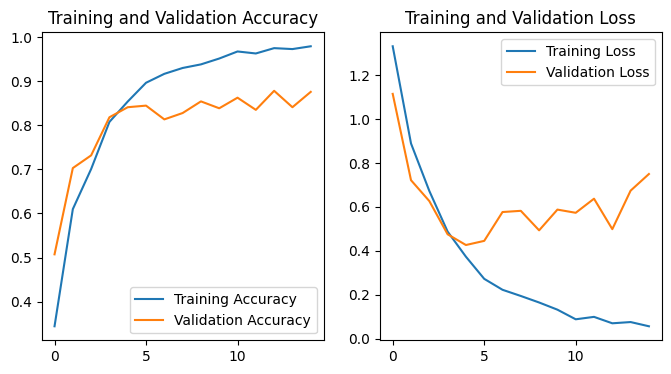

In [22]:
RestNet1_acc = RestNet_1.history['accuracy']
RestNet1_val_acc = RestNet_1.history['val_accuracy']

RestNet1_loss = RestNet_1.history['loss']
RestNet1_val_loss = RestNet_1.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, RestNet1_acc, label='Training Accuracy')
plt.plot(epochs_range, RestNet1_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, RestNet1_loss, label='Training Loss')
plt.plot(epochs_range, RestNet1_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 355s 24s/step


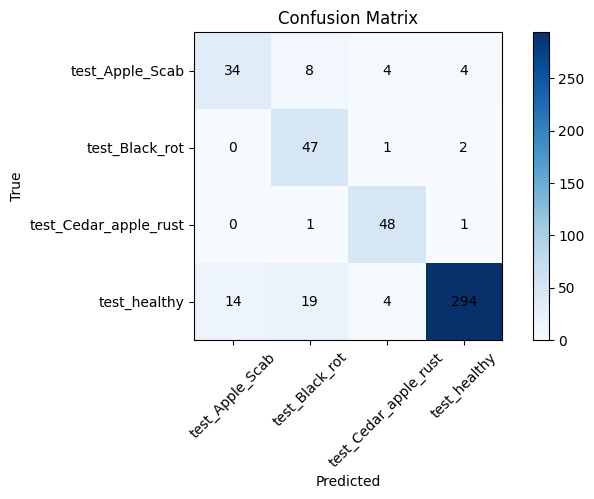

In [23]:
predictions = RestNet_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [24]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.71      0.68      0.69        50
       test_Black_rot       0.63      0.94      0.75        50
test_Cedar_apple_rust       0.84      0.96      0.90        50
         test_healthy       0.98      0.89      0.93       331

             accuracy                           0.88       481
            macro avg       0.79      0.87      0.82       481
         weighted avg       0.90      0.88      0.88       481



Learning Rate = 0.005

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005)

RestNet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
RestNet_2 = RestNet_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-29-28be95f2ada2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  RestNet_2 = RestNet_model.fit_generator(


104/104 [==============================] - 23s 175ms/step - loss: 0.4311 - accuracy: 0.8697 - val_loss: 0.5151 - val_accuracy: 0.8245
Epoch 2/15
104/104 [==============================] - 17s 160ms/step - loss: 0.2594 - accuracy: 0.9096 - val_loss: 0.6216 - val_accuracy: 0.8317
Epoch 3/15
104/104 [==============================] - 15s 143ms/step - loss: 0.2318 - accuracy: 0.9165 - val_loss: 0.4680 - val_accuracy: 0.8582
Epoch 4/15
104/104 [==============================] - 15s 143ms/step - loss: 0.1932 - accuracy: 0.9311 - val_loss: 0.7217 - val_accuracy: 0.7933
Epoch 5/15
104/104 [==============================] - 15s 145ms/step - loss: 0.1958 - accuracy: 0.9301 - val_loss: 0.6630 - val_accuracy: 0.8377
Epoch 6/15
104/104 [==============================] - 15s 144ms/step - loss: 0.1693 - accuracy: 0.9407 - val_loss: 0.5075 - val_accuracy: 0.8450
Epoch 7/15
104/104 [==============================] - 15s 144ms/step - loss: 0.1924 - accuracy: 0.9413 - val_loss: 0.5916 - val_accuracy: 0.8

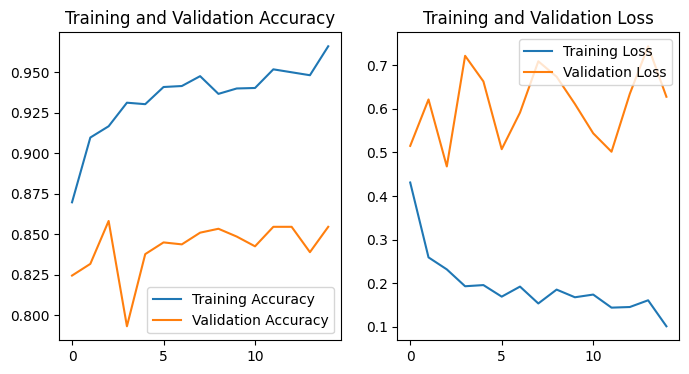

In [31]:
RestNet2_acc = RestNet_2.history['accuracy']
RestNet2_val_acc = RestNet_2.history['val_accuracy']

RestNet2_loss = RestNet_2.history['loss']
RestNet2_val_loss = RestNet_2.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, RestNet2_acc, label='Training Accuracy')
plt.plot(epochs_range, RestNet2_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, RestNet2_loss, label='Training Loss')
plt.plot(epochs_range, RestNet2_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 3s 102ms/step


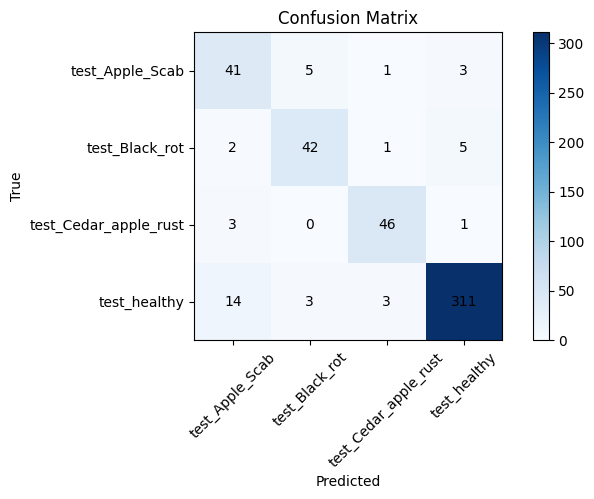

In [32]:
predictions = RestNet_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [33]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.68      0.82      0.75        50
       test_Black_rot       0.84      0.84      0.84        50
test_Cedar_apple_rust       0.90      0.92      0.91        50
         test_healthy       0.97      0.94      0.96       331

             accuracy                           0.91       481
            macro avg       0.85      0.88      0.86       481
         weighted avg       0.92      0.91      0.92       481



### 3. VGG16

In [34]:
VGG_base_model = tf.keras.applications.VGG16(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )

58889256/58889256 [==============================] - 4s 0us/step


In [35]:
for layer in VGG_base_model.layers:
  layer.trainable = False

In [36]:
folders = glob('/content/drive/MyDrive/research_Apple/train/*')


VGG_model = tf.keras.Sequential([
        VGG_base_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

In [37]:
VGG_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 512)         3584      
 chNormalization)                                                
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [40]:
VGG_1 = VGG_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-40-d805928b743d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  VGG_1 = VGG_model.fit_generator(


104/104 [==============================] - 28s 188ms/step - loss: 0.6698 - accuracy: 0.7272 - val_loss: 0.2077 - val_accuracy: 0.9267
Epoch 2/15
104/104 [==============================] - 18s 174ms/step - loss: 0.0992 - accuracy: 0.9658 - val_loss: 0.1273 - val_accuracy: 0.9531
Epoch 3/15
104/104 [==============================] - 17s 159ms/step - loss: 0.0491 - accuracy: 0.9816 - val_loss: 0.1253 - val_accuracy: 0.9615
Epoch 4/15
104/104 [==============================] - 17s 159ms/step - loss: 0.0597 - accuracy: 0.9837 - val_loss: 0.1643 - val_accuracy: 0.9567
Epoch 5/15
104/104 [==============================] - 17s 160ms/step - loss: 0.0395 - accuracy: 0.9888 - val_loss: 0.1052 - val_accuracy: 0.9724
Epoch 6/15
104/104 [==============================] - 17s 163ms/step - loss: 0.0156 - accuracy: 0.9958 - val_loss: 0.1015 - val_accuracy: 0.9760
Epoch 7/15
104/104 [==============================] - 17s 164ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.1483 - val_accuracy: 0.9

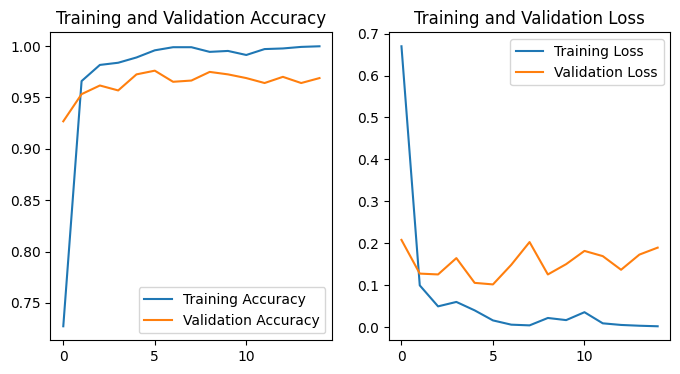

In [41]:
VGG1_acc = VGG_1.history['accuracy']
VGG1_val_acc = VGG_1.history['val_accuracy']

VGG1_loss = VGG_1.history['loss']
VGG1_val_loss = VGG_1.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, VGG1_acc, label='Training Accuracy')
plt.plot(epochs_range, VGG1_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, VGG1_loss, label='Training Loss')
plt.plot(epochs_range, VGG1_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 3s 184ms/step


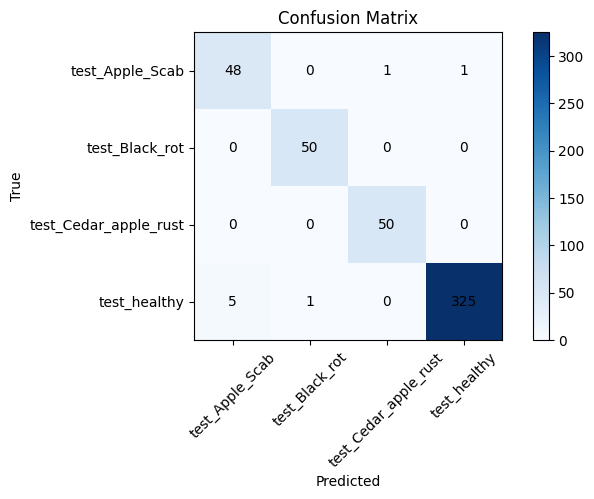

In [42]:
predictions = VGG_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [43]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.91      0.96      0.93        50
       test_Black_rot       0.98      1.00      0.99        50
test_Cedar_apple_rust       0.98      1.00      0.99        50
         test_healthy       1.00      0.98      0.99       331

             accuracy                           0.98       481
            macro avg       0.97      0.99      0.98       481
         weighted avg       0.98      0.98      0.98       481



learning_rate= 0.005

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005)

In [47]:
VGG_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
VGG_2 = VGG_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-48-5ae4382d1a48>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  VGG_2 = VGG_model.fit_generator(


104/104 [==============================] - 21s 182ms/step - loss: 0.1862 - accuracy: 0.9655 - val_loss: 0.1659 - val_accuracy: 0.9639
Epoch 2/15
104/104 [==============================] - 19s 183ms/step - loss: 0.0940 - accuracy: 0.9758 - val_loss: 0.1387 - val_accuracy: 0.9555
Epoch 3/15
104/104 [==============================] - 18s 176ms/step - loss: 0.0560 - accuracy: 0.9879 - val_loss: 0.1894 - val_accuracy: 0.9724
Epoch 4/15
104/104 [==============================] - 18s 176ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.1860 - val_accuracy: 0.9651
Epoch 5/15
104/104 [==============================] - 19s 186ms/step - loss: 0.1229 - accuracy: 0.9800 - val_loss: 0.1948 - val_accuracy: 0.9495
Epoch 6/15
104/104 [==============================] - 18s 170ms/step - loss: 0.0729 - accuracy: 0.9834 - val_loss: 0.1400 - val_accuracy: 0.9724
Epoch 7/15
104/104 [==============================] - 18s 173ms/step - loss: 0.0198 - accuracy: 0.9967 - val_loss: 0.2476 - val_accuracy: 0.9

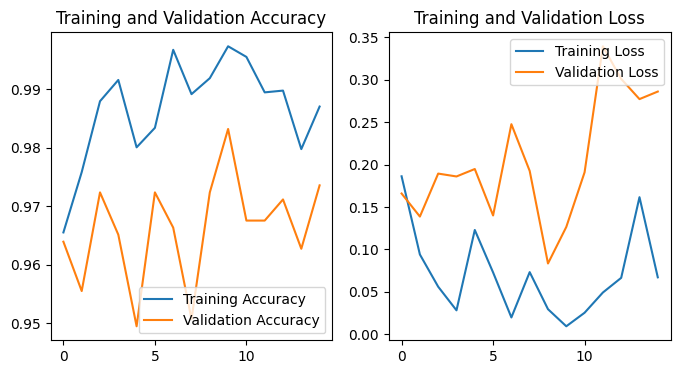

In [50]:
VGG2_acc = VGG_2.history['accuracy']
VGG2_val_acc = VGG_2.history['val_accuracy']

VGG2_loss = VGG_2.history['loss']
VGG2_val_loss = VGG_2.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, VGG2_acc, label='Training Accuracy')
plt.plot(epochs_range,VGG2_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, VGG2_loss, label='Training Loss')
plt.plot(epochs_range, VGG2_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
predictions = VGG_model.predict(test_generator)

16/16 [==============================] - 2s 129ms/step


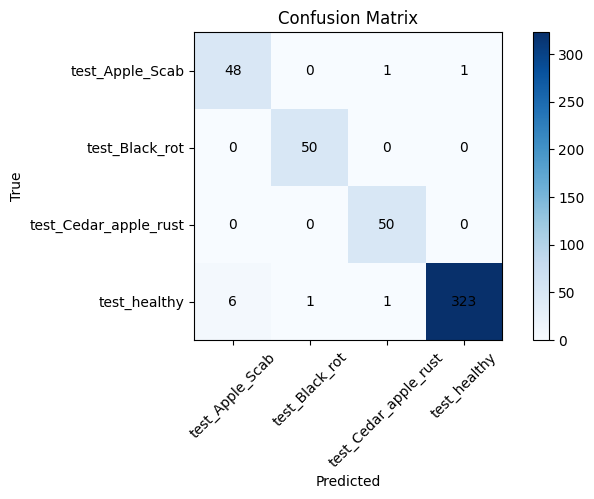

In [52]:
true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [53]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.89      0.96      0.92        50
       test_Black_rot       0.98      1.00      0.99        50
test_Cedar_apple_rust       0.96      1.00      0.98        50
         test_healthy       1.00      0.98      0.99       331

             accuracy                           0.98       481
            macro avg       0.96      0.98      0.97       481
         weighted avg       0.98      0.98      0.98       481



### 4. MobileNetV2


In [54]:
MN_base_model = tf.keras.applications.MobileNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )

9406464/9406464 [==============================] - 1s 0us/step


In [55]:
for layer in MN_base_model.layers:
  layer.trainable = False

In [56]:
folders = glob('/content/drive/MyDrive/research_Apple/train/*')


MN_model = tf.keras.Sequential([
        MN_base_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

In [57]:
MN_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
MN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 batch_normalization_2 (Bat  (None, 7, 7, 1280)        8960      
 chNormalization)                                                
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 512)               655872    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                      

In [60]:
MN_1 = MN_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-60-3ed073f5c915>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  MN_1 = MN_model.fit_generator(


104/104 [==============================] - 20s 146ms/step - loss: 0.2470 - accuracy: 0.9063 - val_loss: 0.0585 - val_accuracy: 0.9820
Epoch 2/15
104/104 [==============================] - 13s 126ms/step - loss: 0.0299 - accuracy: 0.9894 - val_loss: 0.0986 - val_accuracy: 0.9760
Epoch 3/15
104/104 [==============================] - 15s 143ms/step - loss: 0.0313 - accuracy: 0.9921 - val_loss: 0.1006 - val_accuracy: 0.9784
Epoch 4/15
104/104 [==============================] - 14s 130ms/step - loss: 0.0273 - accuracy: 0.9933 - val_loss: 0.0784 - val_accuracy: 0.9844
Epoch 5/15
104/104 [==============================] - 14s 134ms/step - loss: 0.0390 - accuracy: 0.9900 - val_loss: 0.1246 - val_accuracy: 0.9748
Epoch 6/15
104/104 [==============================] - 13s 128ms/step - loss: 0.0330 - accuracy: 0.9912 - val_loss: 0.0980 - val_accuracy: 0.9784
Epoch 7/15
104/104 [==============================] - 14s 132ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0890 - val_accuracy: 0.9

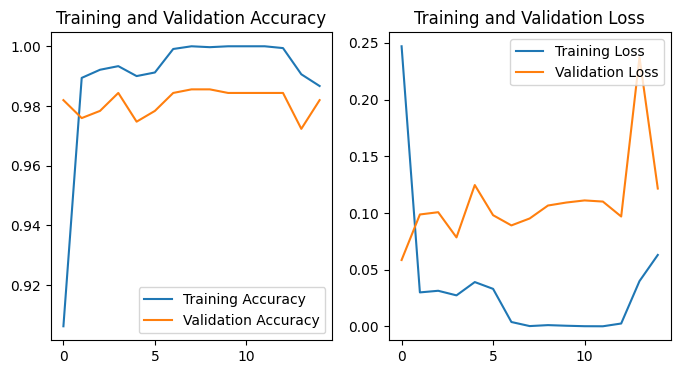

In [62]:
MN1_acc = MN_1.history['accuracy']
MN1_val_acc = MN_1.history['val_accuracy']

MN1_loss = MN_1.history['loss']
MN1_val_loss = MN_1.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, MN1_acc, label='Training Accuracy')
plt.plot(epochs_range, MN1_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, MN1_loss, label='Training Loss')
plt.plot(epochs_range, MN1_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 3s 128ms/step


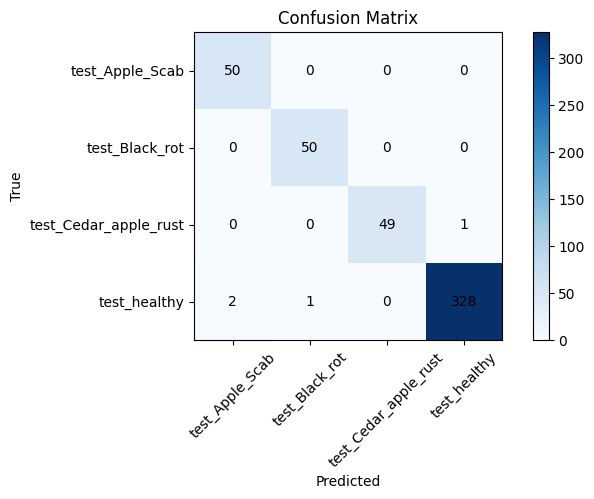

In [63]:
predictions = MN_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [64]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.96      1.00      0.98        50
       test_Black_rot       0.98      1.00      0.99        50
test_Cedar_apple_rust       1.00      0.98      0.99        50
         test_healthy       1.00      0.99      0.99       331

             accuracy                           0.99       481
            macro avg       0.98      0.99      0.99       481
         weighted avg       0.99      0.99      0.99       481



Learning Rate - 0.005

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005)

In [66]:
MN_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
MN_2 = MN_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-68-a668af2edc26>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  MN_2 = MN_model.fit_generator(


104/104 [==============================] - 29s 234ms/step - loss: 0.3299 - accuracy: 0.9652 - val_loss: 0.2545 - val_accuracy: 0.9712
Epoch 2/15
104/104 [==============================] - 13s 125ms/step - loss: 0.1045 - accuracy: 0.9864 - val_loss: 0.4208 - val_accuracy: 0.9748
Epoch 3/15
104/104 [==============================] - 14s 131ms/step - loss: 0.1501 - accuracy: 0.9852 - val_loss: 0.0967 - val_accuracy: 0.9772
Epoch 4/15
104/104 [==============================] - 14s 130ms/step - loss: 0.0189 - accuracy: 0.9949 - val_loss: 0.1199 - val_accuracy: 0.9880
Epoch 5/15
104/104 [==============================] - 13s 125ms/step - loss: 0.0251 - accuracy: 0.9961 - val_loss: 0.1217 - val_accuracy: 0.9820
Epoch 6/15
104/104 [==============================] - 14s 132ms/step - loss: 0.0407 - accuracy: 0.9949 - val_loss: 0.1495 - val_accuracy: 0.9832
Epoch 7/15
104/104 [==============================] - 16s 150ms/step - loss: 0.0162 - accuracy: 0.9955 - val_loss: 0.1966 - val_accuracy: 0.9

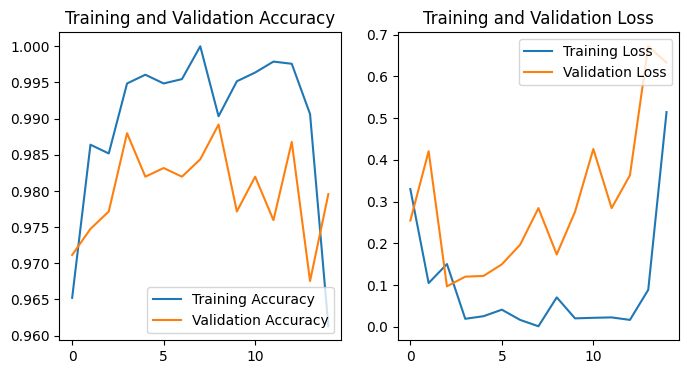

In [69]:
MN2_acc = MN_2.history['accuracy']
MN2_val_acc = MN_2.history['val_accuracy']

MN2_loss = MN_2.history['loss']
MN2_val_loss = MN_2.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, MN2_acc, label='Training Accuracy')
plt.plot(epochs_range, MN2_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, MN2_loss, label='Training Loss')
plt.plot(epochs_range, MN2_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 3s 90ms/step


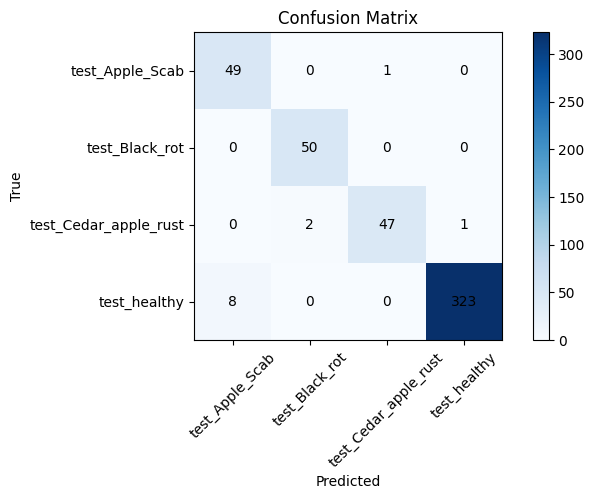

In [70]:
predictions = MN_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [71]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.86      0.98      0.92        50
       test_Black_rot       0.96      1.00      0.98        50
test_Cedar_apple_rust       0.98      0.94      0.96        50
         test_healthy       1.00      0.98      0.99       331

             accuracy                           0.98       481
            macro avg       0.95      0.97      0.96       481
         weighted avg       0.98      0.98      0.98       481



### 5. IncepionV2

In [83]:
# Reset our image data generators
train_datagen.reset()
val_datagen.reset()
test_generator.reset()


In [72]:
IN_base_model = tf.keras.applications.InceptionV3(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )

87910968/87910968 [==============================] - 5s 0us/step


In [73]:
for layer in IN_base_model.layers:
  layer.trainable = False

In [74]:
folders = glob('/content/drive/MyDrive/research_Apple/train/*')


IN_model = tf.keras.Sequential([
        IN_base_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

In [75]:
IN_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
IN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 batch_normalization_97 (Ba  (None, 5, 5, 2048)        14336     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)              

In [77]:
IN_1 = IN_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-77-09e536d2494a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  IN_1 = IN_model.fit_generator(


104/104 [==============================] - 34s 231ms/step - loss: 0.5038 - accuracy: 0.8050 - val_loss: 0.2233 - val_accuracy: 0.9195
Epoch 2/15
104/104 [==============================] - 14s 137ms/step - loss: 0.1682 - accuracy: 0.9456 - val_loss: 0.1755 - val_accuracy: 0.9423
Epoch 3/15
104/104 [==============================] - 14s 135ms/step - loss: 0.1219 - accuracy: 0.9646 - val_loss: 0.1864 - val_accuracy: 0.9543
Epoch 4/15
104/104 [==============================] - 14s 133ms/step - loss: 0.0850 - accuracy: 0.9743 - val_loss: 0.1819 - val_accuracy: 0.9507
Epoch 5/15
104/104 [==============================] - 13s 127ms/step - loss: 0.0889 - accuracy: 0.9743 - val_loss: 0.3201 - val_accuracy: 0.9399
Epoch 6/15
104/104 [==============================] - 15s 141ms/step - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.2471 - val_accuracy: 0.9579
Epoch 7/15
104/104 [==============================] - 15s 142ms/step - loss: 0.0458 - accuracy: 0.9900 - val_loss: 0.2638 - val_accuracy: 0.9

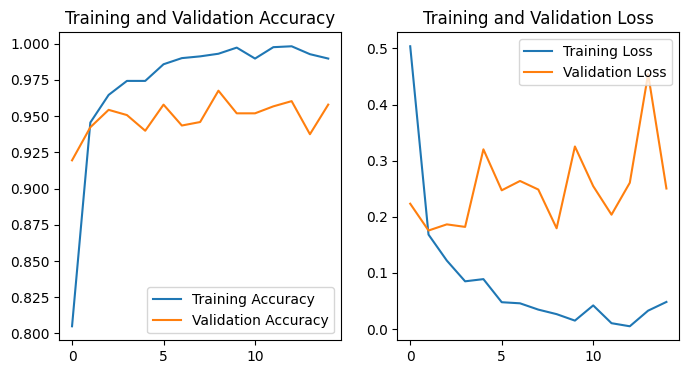

In [78]:
IN1_acc = IN_1.history['accuracy']
IN1_val_acc = IN_1.history['val_accuracy']

IN1_loss = IN_1.history['loss']
IN1_val_loss = IN_1.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, IN1_acc, label='Training Accuracy')
plt.plot(epochs_range, IN1_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, IN1_loss, label='Training Loss')
plt.plot(epochs_range, IN1_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 5s 228ms/step


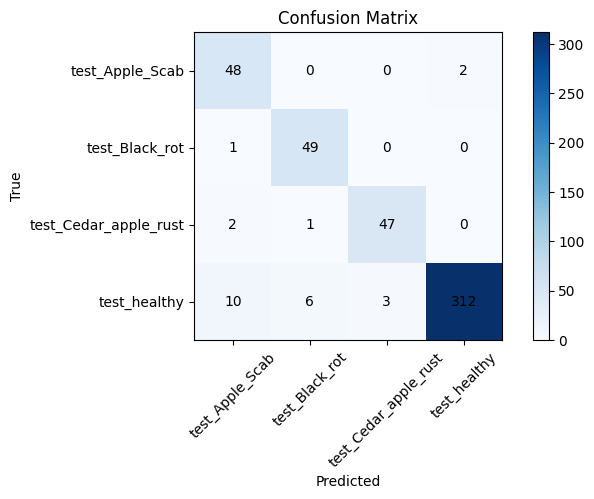

In [79]:
predictions = IN_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [80]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.79      0.96      0.86        50
       test_Black_rot       0.88      0.98      0.92        50
test_Cedar_apple_rust       0.94      0.94      0.94        50
         test_healthy       0.99      0.94      0.97       331

             accuracy                           0.95       481
            macro avg       0.90      0.96      0.92       481
         weighted avg       0.95      0.95      0.95       481



Learning Rate - 0.005

In [81]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005)

IN_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
IN_2 = IN_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-84-1c51e4d4af27>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  IN_2 = IN_model.fit_generator(


104/104 [==============================] - 19s 147ms/step - loss: 0.4288 - accuracy: 0.9380 - val_loss: 0.3047 - val_accuracy: 0.9327
Epoch 2/15
104/104 [==============================] - 17s 160ms/step - loss: 0.1212 - accuracy: 0.9713 - val_loss: 0.4297 - val_accuracy: 0.9495
Epoch 3/15
104/104 [==============================] - 14s 130ms/step - loss: 0.1423 - accuracy: 0.9719 - val_loss: 0.5105 - val_accuracy: 0.9339
Epoch 4/15
104/104 [==============================] - 17s 159ms/step - loss: 0.1215 - accuracy: 0.9794 - val_loss: 0.2860 - val_accuracy: 0.9495
Epoch 5/15
104/104 [==============================] - 14s 135ms/step - loss: 0.1192 - accuracy: 0.9797 - val_loss: 0.4413 - val_accuracy: 0.9519
Epoch 6/15
104/104 [==============================] - 14s 136ms/step - loss: 0.2245 - accuracy: 0.9616 - val_loss: 0.2852 - val_accuracy: 0.9531
Epoch 7/15
104/104 [==============================] - 14s 135ms/step - loss: 0.1142 - accuracy: 0.9770 - val_loss: 0.2615 - val_accuracy: 0.9

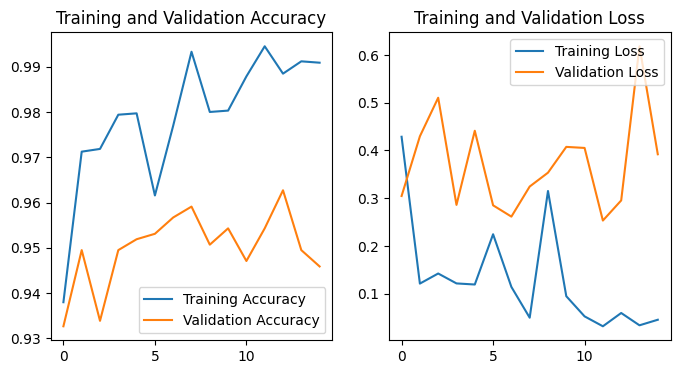

In [85]:
IN2_acc = IN_2.history['accuracy']
IN2_val_acc = IN_2.history['val_accuracy']

IN2_loss = IN_2.history['loss']
IN2_val_loss = IN_2.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, IN2_acc, label='Training Accuracy')
plt.plot(epochs_range, IN2_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, IN2_loss, label='Training Loss')
plt.plot(epochs_range, IN2_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 4s 117ms/step


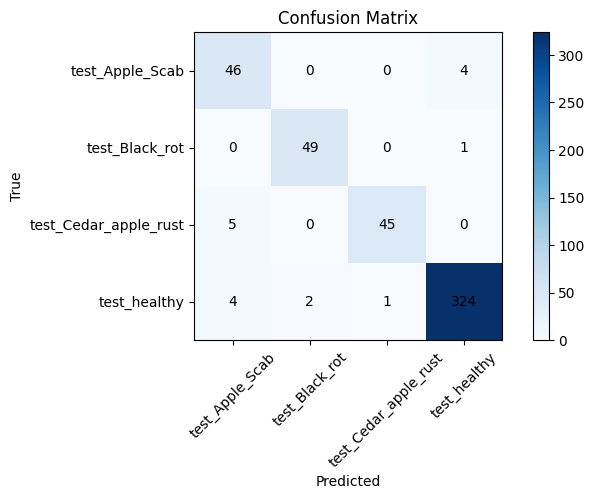

In [86]:
predictions = IN_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [87]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.84      0.92      0.88        50
       test_Black_rot       0.96      0.98      0.97        50
test_Cedar_apple_rust       0.98      0.90      0.94        50
         test_healthy       0.98      0.98      0.98       331

             accuracy                           0.96       481
            macro avg       0.94      0.94      0.94       481
         weighted avg       0.97      0.96      0.97       481



### 6. Xception


In [88]:
XC_base_model = tf.keras.applications.Xception(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )

for layer in XC_base_model.layers:
  layer.trainable = False

folders = glob('/content/drive/MyDrive/research_Apple/train/*')

XC_model = tf.keras.Sequential([
        XC_base_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

83683744/83683744 [==============================] - 5s 0us/step


In [89]:
XC_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
XC_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 batch_normalization_102 (B  (None, 7, 7, 2048)        14336     
 atchNormalization)                                              
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)              

In [96]:
# Reset our image data generators
train_datagen.reset()
val_datagen.reset()
test_generator.reset()


In [91]:
XC_1 = XC_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-91-259314788aa6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  XC_1 = XC_model.fit_generator(


104/104 [==============================] - 31s 221ms/step - loss: 0.4258 - accuracy: 0.8358 - val_loss: 0.1578 - val_accuracy: 0.9435
Epoch 2/15
104/104 [==============================] - 23s 218ms/step - loss: 0.1633 - accuracy: 0.9516 - val_loss: 0.1977 - val_accuracy: 0.9363
Epoch 3/15
104/104 [==============================] - 19s 178ms/step - loss: 0.1241 - accuracy: 0.9719 - val_loss: 0.2002 - val_accuracy: 0.9483
Epoch 4/15
104/104 [==============================] - 18s 172ms/step - loss: 0.0839 - accuracy: 0.9779 - val_loss: 0.2198 - val_accuracy: 0.9555
Epoch 5/15
104/104 [==============================] - 18s 172ms/step - loss: 0.0506 - accuracy: 0.9867 - val_loss: 0.2079 - val_accuracy: 0.9519
Epoch 6/15
104/104 [==============================] - 20s 188ms/step - loss: 0.0490 - accuracy: 0.9891 - val_loss: 0.1665 - val_accuracy: 0.9591
Epoch 7/15
104/104 [==============================] - 18s 173ms/step - loss: 0.0341 - accuracy: 0.9915 - val_loss: 0.2038 - val_accuracy: 0.9

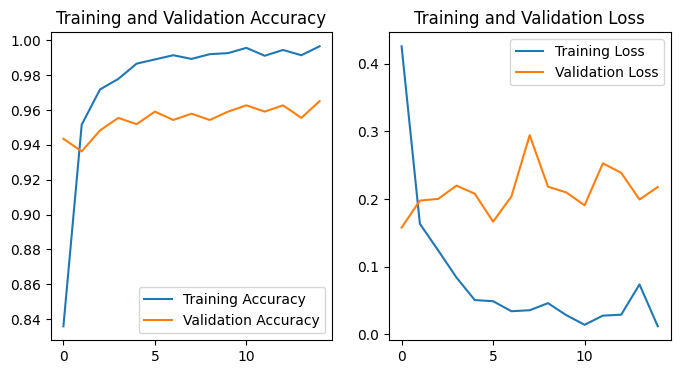

In [92]:
XC1_acc = XC_1.history['accuracy']
XC1_val_acc = XC_1.history['val_accuracy']

XC1_loss = XC_1.history['loss']
XC1_val_loss = XC_1.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, XC1_acc, label='Training Accuracy')
plt.plot(epochs_range, XC1_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, XC1_loss, label='Training Loss')
plt.plot(epochs_range, XC1_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 3s 166ms/step


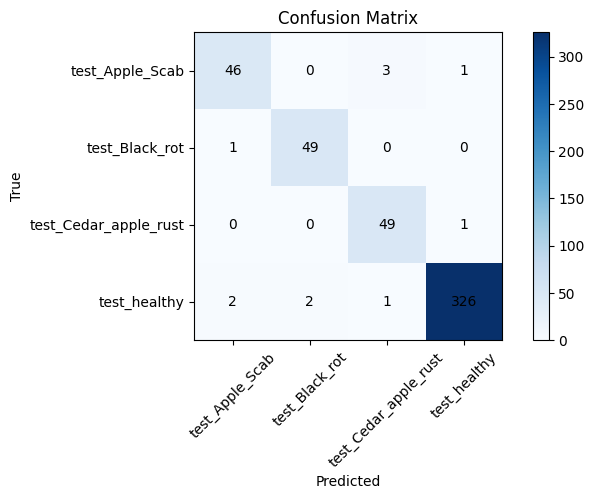

In [93]:
predictions = XC_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [94]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.94      0.92      0.93        50
       test_Black_rot       0.96      0.98      0.97        50
test_Cedar_apple_rust       0.92      0.98      0.95        50
         test_healthy       0.99      0.98      0.99       331

             accuracy                           0.98       481
            macro avg       0.95      0.97      0.96       481
         weighted avg       0.98      0.98      0.98       481



Learning Rate = 0.005

In [95]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005)

XC_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
XC_2 = XC_model.fit_generator(
  train_datagen,
  validation_data=val_datagen,
  epochs=15,
  steps_per_epoch=train_datagen.n//train_datagen.batch_size,
  validation_steps=val_datagen.n//val_datagen.batch_size,
)

Epoch 1/15


<ipython-input-97-14bb110f1a96>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  XC_2 = XC_model.fit_generator(


104/104 [==============================] - 29s 231ms/step - loss: 0.5015 - accuracy: 0.9392 - val_loss: 0.3645 - val_accuracy: 0.9387
Epoch 2/15
104/104 [==============================] - 18s 175ms/step - loss: 0.2174 - accuracy: 0.9607 - val_loss: 0.2439 - val_accuracy: 0.9531
Epoch 3/15
104/104 [==============================] - 18s 176ms/step - loss: 0.0837 - accuracy: 0.9803 - val_loss: 0.2593 - val_accuracy: 0.9411
Epoch 4/15
104/104 [==============================] - 18s 171ms/step - loss: 0.1010 - accuracy: 0.9803 - val_loss: 0.2265 - val_accuracy: 0.9279
Epoch 5/15
104/104 [==============================] - 18s 170ms/step - loss: 0.1078 - accuracy: 0.9731 - val_loss: 0.1656 - val_accuracy: 0.9483
Epoch 6/15
104/104 [==============================] - 20s 187ms/step - loss: 0.0644 - accuracy: 0.9858 - val_loss: 0.1408 - val_accuracy: 0.9663
Epoch 7/15
104/104 [==============================] - 20s 188ms/step - loss: 0.0924 - accuracy: 0.9831 - val_loss: 0.2939 - val_accuracy: 0.9

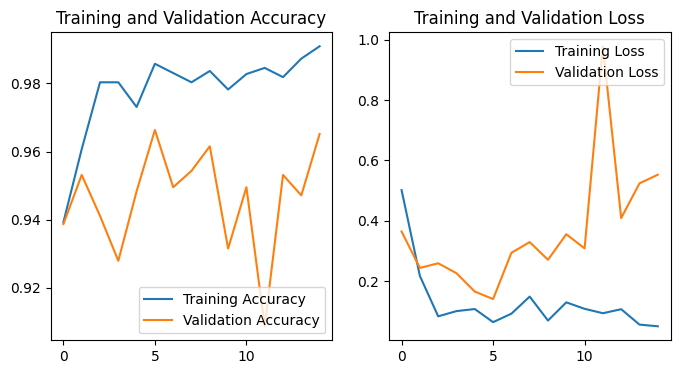

In [101]:
XC2_acc = XC_2.history['accuracy']
XC2_val_acc = XC_2.history['val_accuracy']

XC2_loss = XC_2.history['loss']
XC2_val_loss = XC_2.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, XC2_acc, label='Training Accuracy')
plt.plot(epochs_range, XC2_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, XC2_loss, label='Training Loss')
plt.plot(epochs_range, XC2_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 [==============================] - 3s 136ms/step


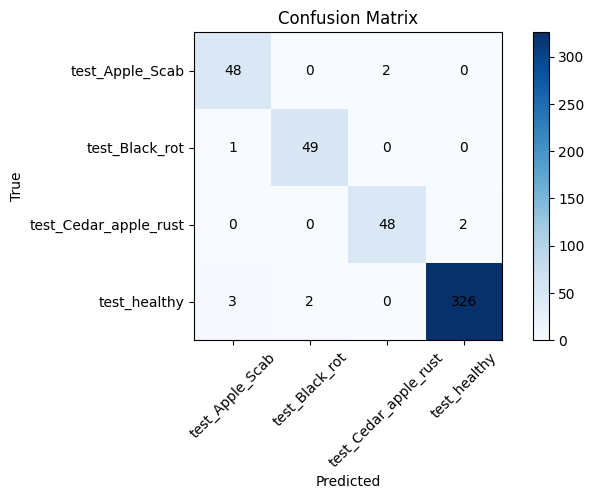

In [99]:
predictions = XC_model.predict(test_generator)

true_labels = test_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to confusion matrix
classes = test_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Display the values inside the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

In [102]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=classes)
print("Classification Report:\n", class_report)

Classification Report:
                        precision    recall  f1-score   support

      test_Apple_Scab       0.92      0.96      0.94        50
       test_Black_rot       0.96      0.98      0.97        50
test_Cedar_apple_rust       0.96      0.96      0.96        50
         test_healthy       0.99      0.98      0.99       331

             accuracy                           0.98       481
            macro avg       0.96      0.97      0.97       481
         weighted avg       0.98      0.98      0.98       481



### Combined Graphs

1. Training Accuracy Graphs

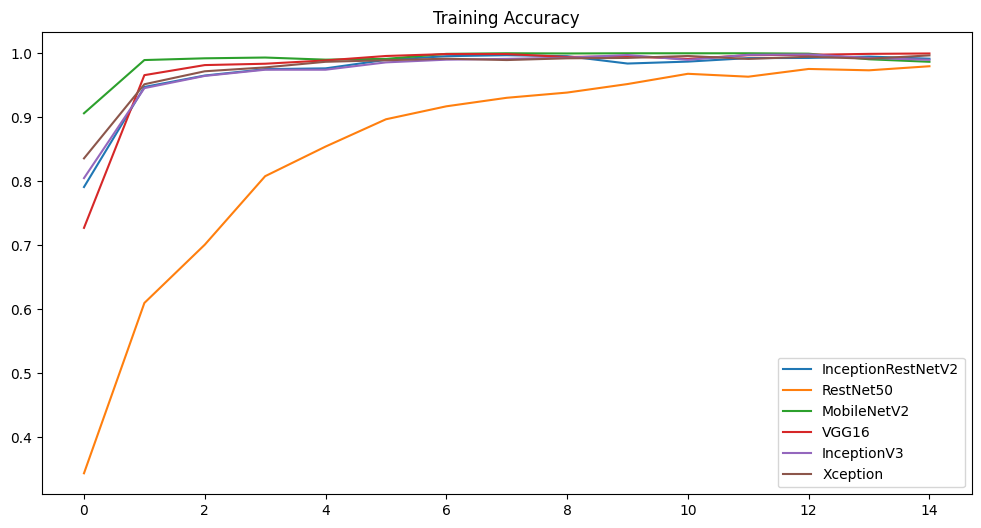

In [149]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Training Accuracy
plt.plot(epochs_range, IR1_acc , label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet1_acc, label='RestNet50')
plt.plot(epochs_range, MN1_acc, label='MobileNetV2')
plt.plot(epochs_range, VGG1_acc, label='VGG16')
plt.plot(epochs_range, IN1_acc, label='InceptionV3')
plt.plot(epochs_range, XC1_acc, label='Xception')

plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.show()

2. Validation Accuracy Graphs

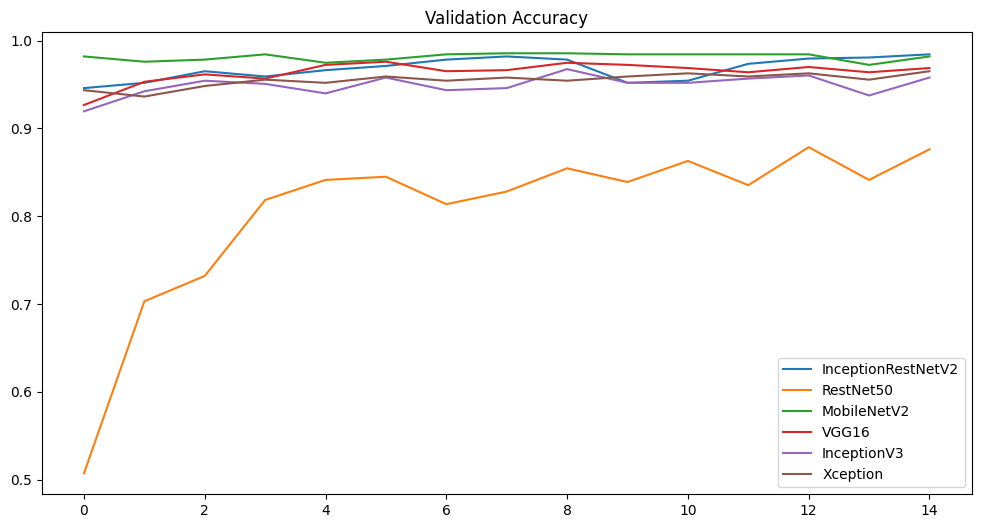

In [148]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Validation Accuracy
plt.plot(epochs_range, IR1_val_acc, label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet1_val_acc, label='RestNet50')
plt.plot(epochs_range, MN1_val_acc, label='MobileNetV2')
plt.plot(epochs_range, VGG1_val_acc, label='VGG16')
plt.plot(epochs_range, IN1_val_acc, label='InceptionV3')
plt.plot(epochs_range, XC1_val_acc, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()

3. Training Loss Graph

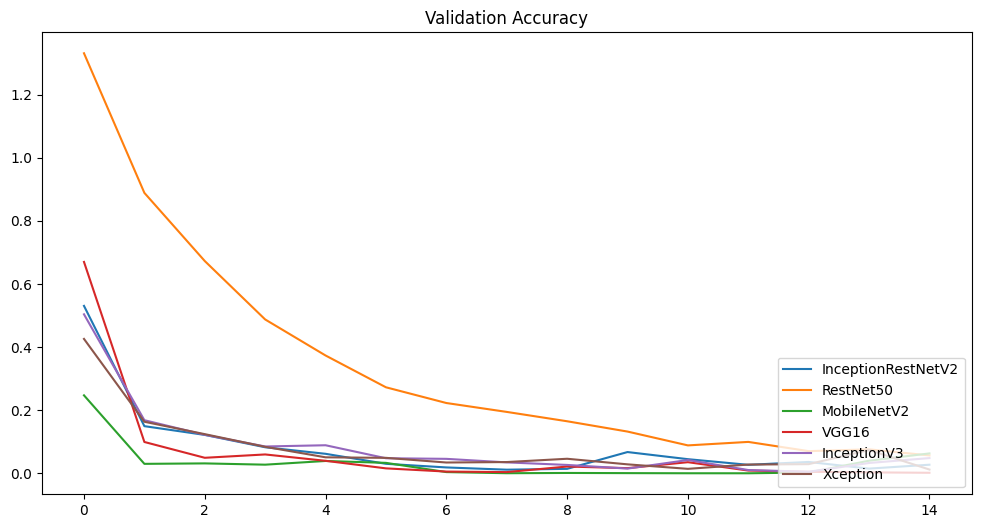

In [146]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Validation Accuracy
plt.plot(epochs_range, IR1_loss , label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet1_loss, label='RestNet50')
plt.plot(epochs_range, MN1_loss, label='MobileNetV2')
plt.plot(epochs_range, VGG1_loss, label='VGG16')
plt.plot(epochs_range, IN1_loss, label='InceptionV3')
plt.plot(epochs_range, XC1_loss, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()

4. Val Loss

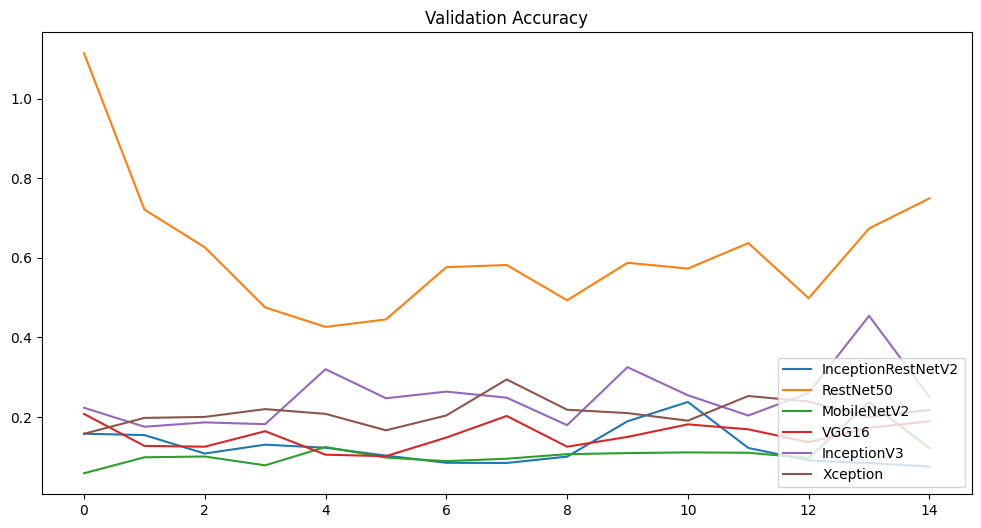

In [150]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Validation Accuracy
plt.plot(epochs_range, IR1_val_loss , label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet1_val_loss, label='RestNet50')
plt.plot(epochs_range, MN1_val_loss, label='MobileNetV2')
plt.plot(epochs_range, VGG1_val_loss, label='VGG16')
plt.plot(epochs_range, IN1_val_loss, label='InceptionV3')
plt.plot(epochs_range, XC1_val_loss, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()

6,4 size

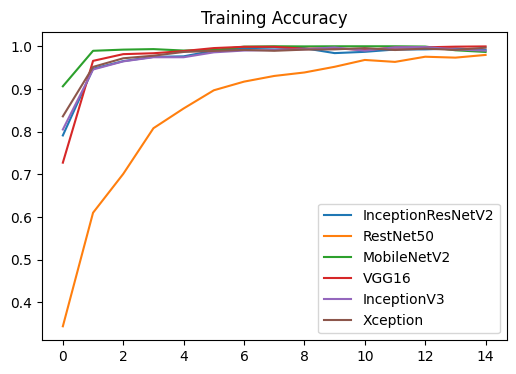

In [138]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(6,4))  # Adjust the figure size as needed

# Training Accuracy
plt.plot(epochs_range, IR1_acc , label='InceptionResNetV2')
plt.plot(epochs_range, RestNet1_acc, label='RestNet50')
plt.plot(epochs_range, MN1_acc, label='MobileNetV2')
plt.plot(epochs_range, VGG1_acc, label='VGG16')
plt.plot(epochs_range, IN1_acc, label='InceptionV3')
plt.plot(epochs_range, XC1_acc, label='Xception')

plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.show()


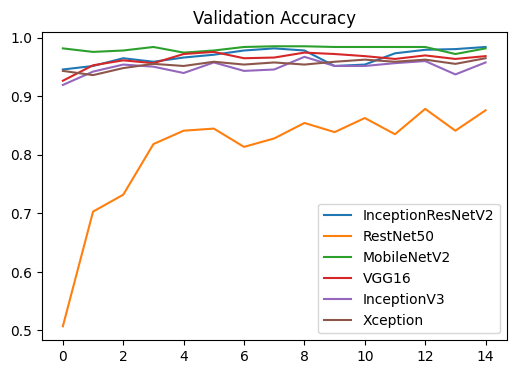

In [139]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Validation Accuracy
plt.plot(epochs_range, IR1_val_acc, label='InceptionResNetV2')
plt.plot(epochs_range, RestNet1_val_acc, label='RestNet50')
plt.plot(epochs_range, MN1_val_acc, label='MobileNetV2')
plt.plot(epochs_range, VGG1_val_acc, label='VGG16')
plt.plot(epochs_range, IN1_val_acc, label='InceptionV3')
plt.plot(epochs_range, XC1_val_acc, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()


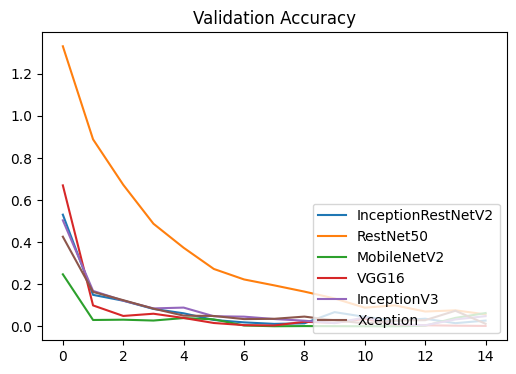

In [140]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# loss
plt.plot(epochs_range, IR1_loss , label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet1_loss, label='RestNet50')
plt.plot(epochs_range, MN1_loss, label='MobileNetV2')
plt.plot(epochs_range, VGG1_loss, label='VGG16')
plt.plot(epochs_range, IN1_loss, label='InceptionV3')
plt.plot(epochs_range, XC1_loss, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()


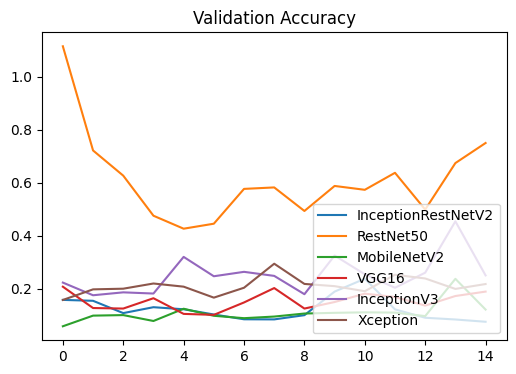

In [141]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Validation loss
plt.plot(epochs_range, IR1_val_loss , label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet1_val_loss, label='RestNet50')
plt.plot(epochs_range, MN1_val_loss, label='MobileNetV2')
plt.plot(epochs_range, VGG1_val_loss, label='VGG16')
plt.plot(epochs_range, IN1_val_loss, label='InceptionV3')
plt.plot(epochs_range, XC1_val_loss, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()

Learning Rate 0.005

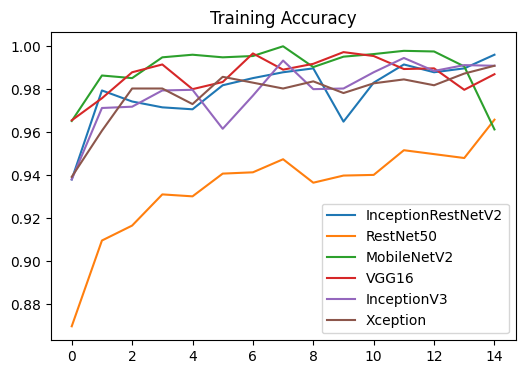

In [142]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(6,4))  # Adjust the figure size as needed

# Training Accuracy
plt.plot(epochs_range, IR2_acc , label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet2_acc, label='RestNet50')
plt.plot(epochs_range, MN2_acc, label='MobileNetV2')
plt.plot(epochs_range, VGG2_acc, label='VGG16')
plt.plot(epochs_range, IN2_acc, label='InceptionV3')
plt.plot(epochs_range, XC2_acc, label='Xception')

plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.show()

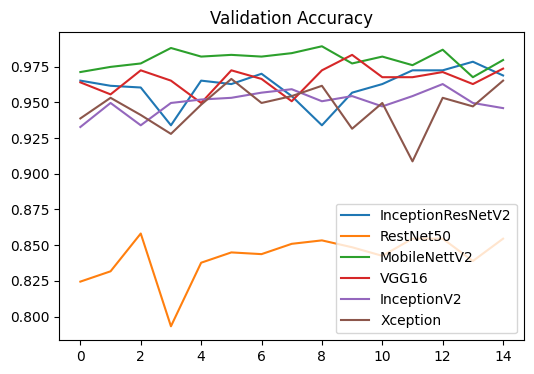

In [143]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Validation Accuracy
plt.plot(epochs_range, IR2_val_acc, label='InceptionResNetV2')
plt.plot(epochs_range, RestNet2_val_acc, label='RestNet50')
plt.plot(epochs_range, MN2_val_acc, label='MobileNettV2')
plt.plot(epochs_range, VGG2_val_acc, label='VGG16')
plt.plot(epochs_range, IN2_val_acc, label='InceptionV2')
plt.plot(epochs_range, XC2_val_acc, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()


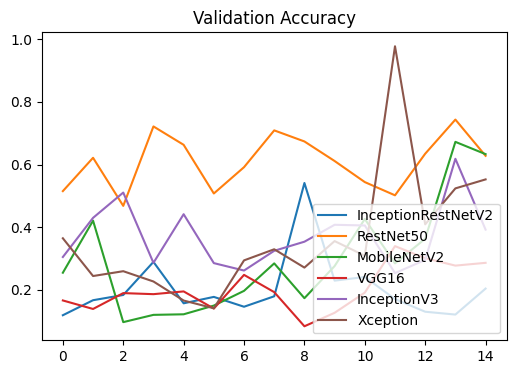

In [144]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Validation loss
plt.plot(epochs_range, IR2_val_loss , label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet2_val_loss, label='RestNet50')
plt.plot(epochs_range, MN2_val_loss, label='MobileNetV2')
plt.plot(epochs_range, VGG2_val_loss, label='VGG16')
plt.plot(epochs_range, IN2_val_loss, label='InceptionV3')
plt.plot(epochs_range, XC2_val_loss, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()

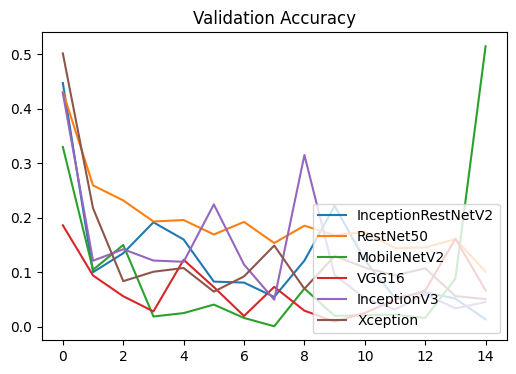

In [145]:
# Combine line graphs for all models
epochs_range = range(15)

plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# loss
plt.plot(epochs_range, IR2_loss , label='InceptionRestNetV2')
plt.plot(epochs_range, RestNet2_loss, label='RestNet50')
plt.plot(epochs_range, MN2_loss, label='MobileNetV2')
plt.plot(epochs_range, VGG2_loss, label='VGG16')
plt.plot(epochs_range, IN2_loss, label='InceptionV3')
plt.plot(epochs_range, XC2_loss, label='Xception')

plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()